In [ ]:
# hasil pengerjaan point 1.1

!kaggle datasets download -d forderation/breakhis-400x

 99% 794M/803M [00:10<00:00, 57.7MB/s]
100% 803M/803M [00:10<00:00, 82.0MB/s]


In [ ]:
# Ekstrak Dataset

import os
import zipfile

local_zip = '/content/breakhis-400x.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Inisialisasi Directory tiap label dataset
import os
base_dir ='/content/drive/MyDrive/praktikum'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [ ]:
# hasil pengerjaan point 1.2
# Menampilkan hasil jumlah pembagian

import os
import shutil

testbenign = "/content/drive/MyDrive/praktikum/test/benign"
testmalignant = "/content/drive/MyDrive/praktikum/test/malignant"
trainbenign = "/content/drive/MyDrive/praktikum/train/benign"
trainmalignant = "/content/drive/MyDrive/praktikum/train/malignant"

test_b = os.listdir(testbenign)
test_m = os.listdir(testmalignant)
train_b = os.listdir(trainbenign)
train_m = os.listdir(trainmalignant)

print ("Jumlah Train Benign :"+ str(len(train_b)))
print ("Jumlah Train Malignant :"+ str(len(train_m)))
print ("Jumlah Test Benign :"+ str(len(test_b)))
print ("Jumlah Test Malignant :"+ str(len(test_m)))

Jumlah Train Benign :371
Jumlah Train Malignant :777
Jumlah Test Benign :176
Jumlah Test Malignant :369


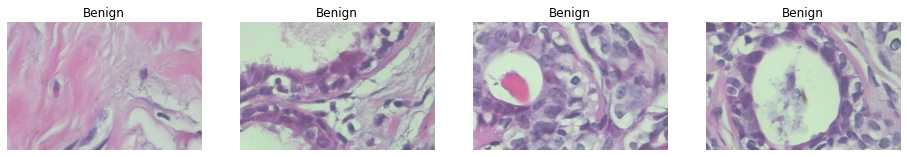

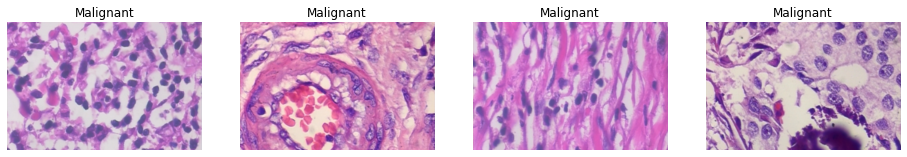

In [ ]:
# hasil pengerjaan point 1.3
# Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom

import matplotlib.pyplot as plt
import matplotlib.image as mping

trainbenign_dir = os.path.join('/content/drive/MyDrive/praktikum/train/benign')
trainmalignant_dir = os.path.join('/content/drive/MyDrive/praktikum/train/malignant') 

benign_image = os.listdir(trainbenign_dir)
malignant_image = os.listdir(trainmalignant_dir)

fname1 = [os.path.join(trainbenign_dir,fname)
        for fname in benign_image[:4]]

fname2 = [os.path.join(trainmalignant_dir,fname)
        for fname in malignant_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Benign')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Malignant')
    plt.imshow(img)
    
plt.show()

In [ ]:
# hasil pengerjaan point 2.1
# Gather data training dan testing dengan ukuran gambar 250x250

import os 
import cv2
import numpy as np

# gather data train
train_data = []
train_label = []

train_dir = os.path.join('/content/drive/MyDrive/praktikum/train')
for r, d, f in os.walk(train_dir):
  for file in f :
    if ".png" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      train_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

# gather data testing
test_data = []
test_label = []

test_dir = os.path.join('/content/drive/MyDrive/praktikum/test')
for r, d, f in os.walk(test_dir):
  for file in f :
    if ".png" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (250,250))
      test_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Test Data =  (545, 250, 250, 3)
Test Label =  (545,)


In [ ]:
# hasil pengerjaan point 2.2
# Normalisasi dataset

print("Data sebelum di-normalisasi : ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0

print("Data sesudah di-normalisasi : ", x_train[0][0][0])

Data sebelum di-normalisasi :  [192 190 189]
Data sesudah di-normalisasi :  [0.7529412  0.74509805 0.7411765 ]


In [ ]:
# hasil pengerjaan point 2.3
# Membuat label encoder

from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder", train_label[366:376])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder", y_train[366:376])
print("Hasil Kelas : ", train_label[370:372])

Label sebelum di-encoder ['benign' 'benign' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant']
Label setelah di-encoder [0 0 0 0 0 1 1 1 1 1]
Hasil Kelas :  ['benign' 'malignant']


In [ ]:
# Model Scenario Pertama 3.1
# Membuat & menampilkan scenario Pertama


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalMaxPool2D, Conv2D, MaxPool2D, Flatten


# Feature Extraction Layer
model1 = Sequential()
model1.add(InputLayer(input_shape = [250,250,3]))
# model1.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(GlobalMaxPool2D())
model1.add(Flatten())

# Fully Connected Layer

model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Summary Scenario Pertama

print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [ ]:
# Compiling Scenario Pertama

from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Model Scenario Kedua 3.2
# Membuat & menampilkan summary model scenario Kedua
# Summary Scenario Kedua 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten

# Feature Extraction Layer
model2 = Sequential()
model2.add(InputLayer(input_shape = [250,250,3]))
# model2.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
# model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
# model2.add(MaxPool2D(pool_size=2, padding='same'))
# model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
# model2.add(MaxPool2D(pool_size=2, padding='same'))
# model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
# model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())

# Fully Connected Layer

model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Summary Scenario Pertama

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [ ]:
# Training model scenario Pertama
# Training model scenario Pertama

Sc1 = model1.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
36/36 [==============================] - 35s 116ms/step - loss: 0.5921 - acc: 0.6777 - val_loss: 0.5627 - val_acc: 0.6771
Epoch 2/50
36/36 [==============================] - 3s 81ms/step - loss: 0.5106 - acc: 0.7648 - val_loss: 0.4952 - val_acc: 0.7963
Epoch 3/50
36/36 [==============================] - 3s 83ms/step - loss: 0.4707 - acc: 0.7909 - val_loss: 0.5293 - val_acc: 0.7266
Epoch 4/50
36/36 [==============================] - 3s 83ms/step - loss: 0.4296 - acc: 0.8380 - val_loss: 0.4192 - val_acc: 0.8459
Epoch 5/50
36/36 [==============================] - 3s 83ms/step - loss: 0.3631 - acc: 0.8815 - val_loss: 0.3941 - val_acc: 0.8642
Epoch 6/50
36/36 [==============================] - 3s 84ms/step - loss: 0.4054 - acc: 0.8371 - val_loss: 0.4047 - val_acc: 0.8642
Epoch 7/50
36/36 [==============================] - 3s 83ms/step - loss: 0.3587 - acc: 0.8763 - val_loss: 0.3815 - val_acc: 0.8642
Epoch 8/50
36/36 [==============================] - 3s 86ms/step - loss: 0.3641 -

In [ ]:
# Hasil pengerjaan point 4.3
# Klasifikasi report dari SC1 

from sklearn.metrics import classification_report

pred = model1.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))


              precision    recall  f1-score   support

           0       0.75      0.89      0.82       176
           1       0.94      0.86      0.90       369

    accuracy                           0.87       545
   macro avg       0.85      0.88      0.86       545
weighted avg       0.88      0.87      0.87       545



In [ ]:
# Compiling Scenario Kedua

from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Training model scenario Kedua
# Training model scenario Kedua
Sc2 = model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
36/36 [==============================] - 4s 94ms/step - loss: 0.6236 - acc: 0.6768 - val_loss: 0.5985 - val_acc: 0.6771
Epoch 2/50
36/36 [==============================] - 3s 83ms/step - loss: 0.5303 - acc: 0.7247 - val_loss: 0.5614 - val_acc: 0.6936
Epoch 3/50
36/36 [==============================] - 3s 88ms/step - loss: 0.4737 - acc: 0.7822 - val_loss: 0.5059 - val_acc: 0.8037
Epoch 4/50
36/36 [==============================] - 3s 84ms/step - loss: 0.4493 - acc: 0.8075 - val_loss: 0.4736 - val_acc: 0.8183
Epoch 5/50
36/36 [==============================] - 3s 83ms/step - loss: 0.4398 - acc: 0.8206 - val_loss: 0.4598 - val_acc: 0.8312
Epoch 6/50
36/36 [==============================] - 3s 84ms/step - loss: 0.4446 - acc: 0.8188 - val_loss: 0.4691 - val_acc: 0.8092
Epoch 7/50
36/36 [==============================] - 3s 84ms/step - loss: 0.4382 - acc: 0.8188 - val_loss: 0.4489 - val_acc: 0.8367
Epoch 8/50
36/36 [==============================] - 3s 83ms/step - loss: 0.4127 - a

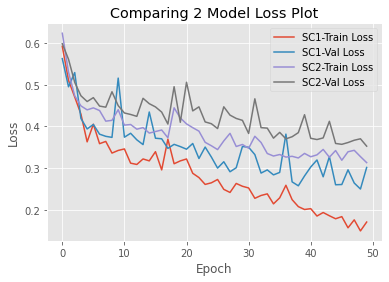

In [ ]:
# Hasil pengerjaan point 4.1
# Plot hasil akurasi dan loss dari kedua model

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,50), Sc1.history["loss"], label="SC1-Train Loss")
plt.plot(np.arange(0,50), Sc1.history["val_loss"], label="SC1-Val Loss")
plt.plot(np.arange(0,50), Sc2.history["loss"], label="SC2-Train Loss")
plt.plot(np.arange(0,50), Sc2.history["val_loss"], label="SC2-Val Loss")
plt.title("Comparing 2 Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

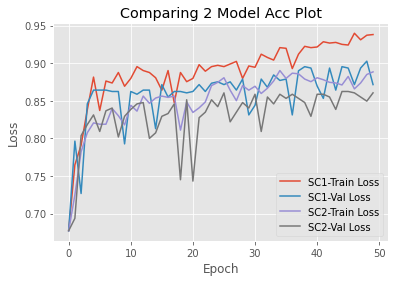

In [ ]:
# Hasil pengerjaan point 4.1
# Plot hasil akurasi dan loss dari kedua model

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,50), Sc1.history["acc"], label="SC1-Train Loss")
plt.plot(np.arange(0,50), Sc1.history["val_acc"], label="SC1-Val Loss")
plt.plot(np.arange(0,50), Sc2.history["acc"], label="SC2-Train Loss")
plt.plot(np.arange(0,50), Sc2.history["val_acc"], label="SC2-Val Loss")
plt.title("Comparing 2 Model Acc Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Saving SOB_M_DC-14-2523-400-017.png to SOB_M_DC-14-2523-400-017.png
SC1 : Malignant
Sc2 : Malignant


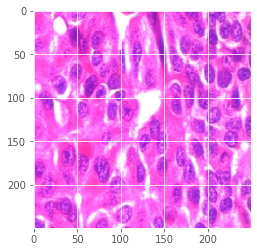

In [ ]:
# Hasil pengerjaan point 4.2
# Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2 (10 point)
# Uji Coba Model 1

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(250,250))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model1.predict(images, batch_size=10)
  classed = model2.predict(images, batch_size=10)

  if classes == 0:
    print('SC1 : Benign')
  else:
    print('SC1 : Malignant')

  if classed == 0:
    print('SC2 : Benign')
  else:
    print('Sc2 : Malignant')


In [ ]:
# Hasil pengerjaan point 4.3
# Klasifikasi report dari SC1 (5 point)

from sklearn.metrics import classification_report

pred = model1.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))


              precision    recall  f1-score   support

           0       0.75      0.89      0.82       176
           1       0.94      0.86      0.90       369

    accuracy                           0.87       545
   macro avg       0.85      0.88      0.86       545
weighted avg       0.88      0.87      0.87       545



In [ ]:
# Hasil pengerjaan point 4.3
# Klasifikasi report dari SC2 (5 point)

from sklearn.metrics import classification_report

pred = model2.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       176
           1       0.88      0.92      0.90       369

    accuracy                           0.86       545
   macro avg       0.85      0.83      0.84       545
weighted avg       0.86      0.86      0.86       545

